In [3]:
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
os.getcwd()

'C:\\Users\\litle'

In [5]:
os.chdir("C:\\Users\\litle\\OneDrive\\Desktop\\woking direectory")

# LOAD THE DATASET

In [6]:
df_house_price= pd.read_csv("house_price.csv")

In [7]:
df_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df_house_price.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


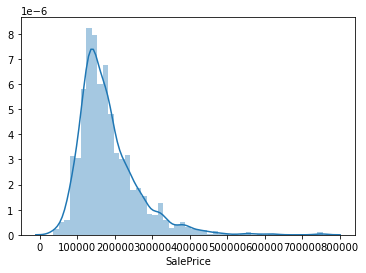

In [9]:
sns.distplot(df_house_price["SalePrice"])

# OVERALL QUALITY

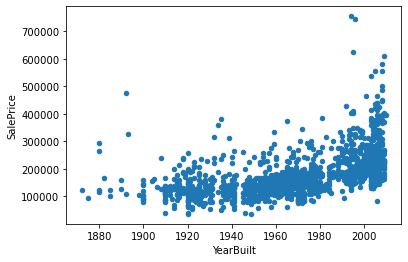

In [10]:
#SCATTERPLOT OVERALLQUAL/SALE PRICE
data= pd.concat([df_house_price["SalePrice"],df_house_price["YearBuilt"]],axis=1)
data.plot.scatter(x="YearBuilt",y="SalePrice",ylim=(0.800000));

In [17]:
df_house_price.boxplot(column="SalePrice",
                       by="Foundation",
                       figsize=(8,8)

SyntaxError: unexpected EOF while parsing (<ipython-input-17-6796d31da336>, line 3)

In [19]:
total_missing_value= df_house_price.isnull().sum().sort_values(ascending=False)
total_missing_value

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

# ALLEY

In [20]:
df_house_price["Alley"]= df_house_price["Alley"].fillna("None")

# FENCE

In [22]:
df_house_price["Fence"]= df_house_price["Fence"].fillna("None")

# FIREPLACEQU

In [23]:
df_house_price["FireplaceQu"]= df_house_price["FireplaceQu"].fillna("None")

# LOT FRONTAGE

In [24]:
df_house_price["LotFrontage"] = df_house_price.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


In [25]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')


In [26]:
fa=FactorAnalyzer(rotation=None)
fa.fit(df,25)
ev,v=fa.get_eigenvalues()
fa.loadings_
fa.get_communalities()
fa.get_eigenvalues()
#Create the scree plot

plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)

plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Values')
plt.grid()
plt.show()
# Create factor analysis object and perform factor analysis
fa_varimax = FactorAnalyzer(rotation="varimax")
fa_varimax.fit(df)
fa_varimax.loadings_


NameError: name 'FactorAnalyzer' is not defined

In [27]:
Factor Analysis Vs. Principle Component Analysis
PCA components explain the maximum amount of variance while factor analysis explains the covariance in data.
PCA components are fully orthogonal to each other whereas factor analysis does not require factors to be orthogonal.
PCA component is a linear combination of the observed variable while in FA, the observed variables are linear combinations of the unobserved variable or factor.
PCA components are uninterpretable. In FA, underlying factors are labelable and interpretable.
PCA is a kind of dimensionality reduction method whereas factor analysis is the latent variable method.
PCA is a type of factor analysis. PCA is observational whereas FA is a modeling technique.


SyntaxError: invalid syntax (<ipython-input-27-50bc286f4ca8>, line 1)